In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("retail_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
   df.shape

(200, 5)

In [4]:
df.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'}, inplace=True)

In [5]:
df.head()

,CustomerID,Gender,Age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Visualization

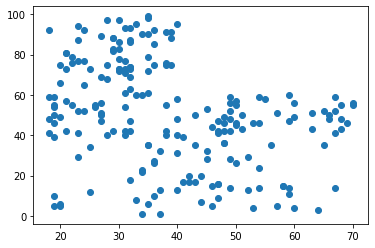

In [6]:
plt.scatter(df['Age'], df['score'])

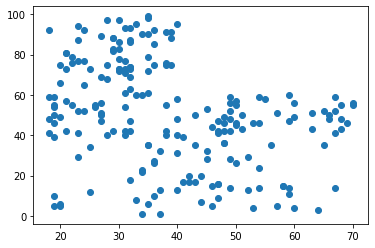

In [7]:
plt.scatter(df['Age'], df['score'])

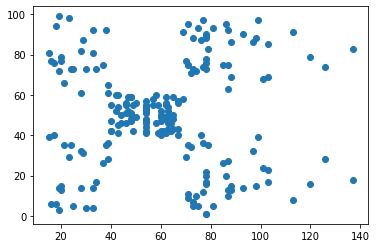

In [8]:
plt.scatter(df['income'],df['score'])

# Pair plot with Seaborn

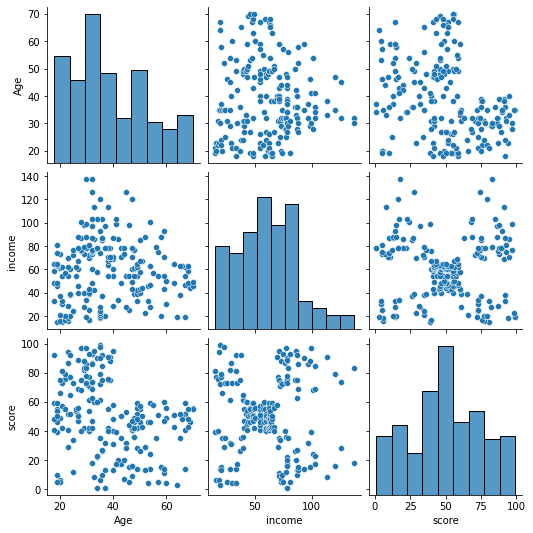

In [9]:
sns.pairplot(df[['Age','income','score']])

In [10]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'income', 'score'], dtype='object')

In [17]:
df = df.drop(['CustomerID', 'Gender', 'Age'], axis=1)

In [18]:
df.head()

,income,score,cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [19]:
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans()

In [24]:
df['cluster'] = kmeans.fit_predict(df[['income','score']])

In [25]:
df

,income,score,cluster
0,15,39,2
1,15,81,5
2,16,6,2
3,16,77,5
4,17,40,2
...,...,...,...
195,120,79,3
196,126,28,0
197,126,74,3
198,137,18,0


In [26]:
centers = kmeans.cluster_centers_
centers

array([[109.7       ,  22.        ],
       [ 62.23404255,  47.55319149],
       [ 25.14285714,  19.52380952],
       [109.7       ,  82.        ],
       [ 79.70833333,  14.29166667],
       [ 25.0952381 ,  80.04761905],
       [ 78.55172414,  82.17241379],
       [ 45.97368421,  51.26315789]])

# Data Visualization

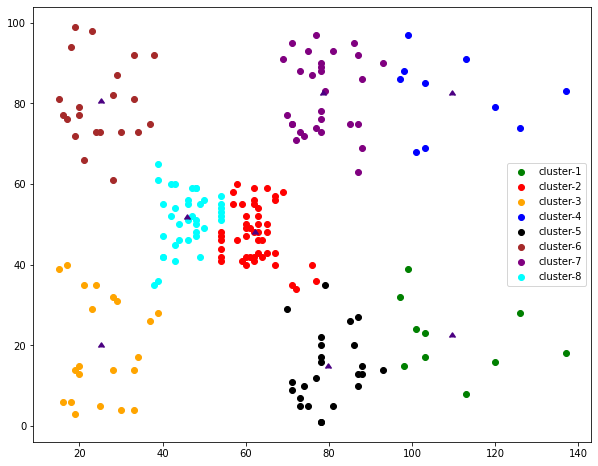

In [53]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
df6 = df[df.cluster == 5]
df7 = df[df.cluster == 6]
df8 = df[df.cluster == 7]


plt.figure(figsize=(10,8))

plt.scatter(df1['income'],df1['score'],color='green',label='cluster-1')
plt.scatter(df2['income'],df2['score'],color='red',label='cluster-2')
plt.scatter(df3['income'],df3['score'],color='orange',label='cluster-3')
plt.scatter(df4['income'],df4['score'],color='blue',label='cluster-4')
plt.scatter(df5['income'],df5['score'],color='black',label='cluster-5')
plt.scatter(df6['income'],df6['score'],color='brown',label='cluster-6')
plt.scatter(df7['income'],df7['score'],color='purple',label='cluster-7')
plt.scatter(df8['income'],df8['score'],color='cyan',label='cluster-8')

plt.scatter(centers[:,0],centers[:,1], color='indigo', marker = 10)

plt.legend()


# Tuning

In [54]:
wcss = []
cluster = range(1,12)
for k in cluster:
    km = KMeans(n_clusters=k)
    km.fit(df[['income','score']])
    wcss.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [55]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 24990.434310396893,
 21829.135638779822,
 19692.55741822776,
 17556.600879214173]

Text(0, 0.5, 'Sum of Squared Errors')

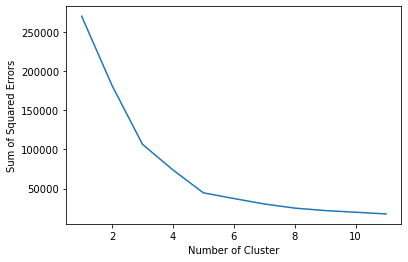

In [56]:
plt.plot(cluster,wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('Sum of Squared Errors')

# knee Locator

In [57]:
!pip install kneed

In [58]:
from kneed import KneeLocator

In [59]:
kneedle = KneeLocator(cluster, wcss, curve='convex',direction='decreasing')

In [60]:
optimal_cluster = kneedle.knee

In [62]:
print('Optimal Number of Cluster is ',optimal_cluster)

Optimal Number of Cluster is  5


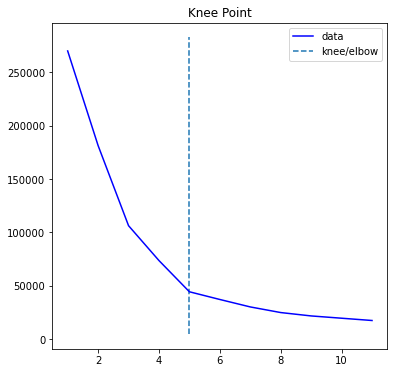

In [63]:
kneedle.plot_knee()

# After Tuning

In [64]:
c

NameError: name 'c' is not defined

In [65]:
df = df.drop('cluster',axis=1)

In [66]:
df['New_Cluster'] = kmeans.fit_predict(df[['income','score']])
df.head()

,income,score,New_Cluster
0,15,39,0
1,15,81,4
2,16,6,0
3,16,77,4
4,17,40,0


In [67]:
center = kmeans.cluster_centers_

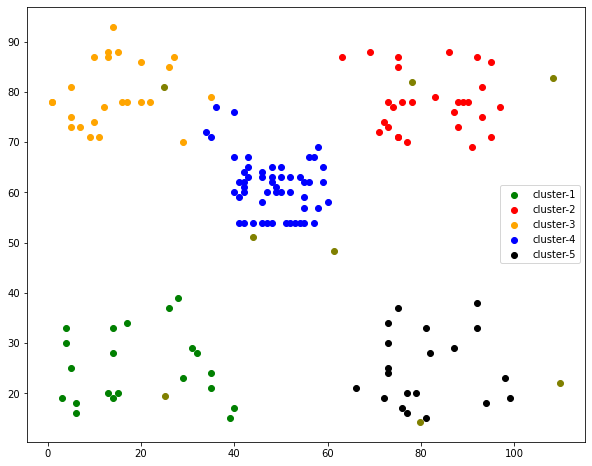

In [68]:
df1 = df[df.New_Cluster == 0]
df2 = df[df.New_Cluster == 1]
df3 = df[df.New_Cluster == 2]
df4 = df[df.New_Cluster == 3]
df5 = df[df.New_Cluster == 4]


plt.figure(figsize=(10,8))

plt.scatter(df1['score'],df1['income'],color='green',label='cluster-1')
plt.scatter(df2['score'],df2['income'],color='red',label='cluster-2')
plt.scatter(df3['score'],df3['income'],color='orange',label='cluster-3')
plt.scatter(df4['score'],df4['income'],color='blue',label='cluster-4')
plt.scatter(df5['score'],df5['income'],color='black',label='cluster-5')


plt.scatter(center[:,0],center[:,1], color='olive')

plt.legend()
